# Car Make and Model Recognizer
I shall explore here my tries to reach a good optimizer

## Importing Libraries

In [1]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Flatten, Dense, BatchNormalization, Activation, PReLU
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from glob import glob
from keras import regularizers
from keras.layers.advanced_activations import PReLU

Using TensorFlow backend.


## Pre-Processing

### Data Augmentation

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.25,
                                   rotation_range = 90,
                                   horizontal_flip=True,
                                  validation_split = 0.3)
#test_datagen = ImageDataGenerator(rescale=1./255,
 #                                horizontal_flip = True)

train_data = train_datagen.flow_from_directory('My_Cars/trainCropped',
                                              target_size=(128, 128),
                                              batch_size=32,
                                              class_mode='categorical',
                                              subset='training')
test_data = train_datagen.flow_from_directory('My_Cars/trainCropped',
                                              target_size=(128, 128),
                                              batch_size=32,
                                              class_mode='categorical',
                                            subset='validation')

Found 5796 images belonging to 196 classes.
Found 2348 images belonging to 196 classes.


## Model

In [3]:
model = Sequential()


### TODO: Define your architecture.
model.add(Conv2D(filters=32, kernel_size=4, strides=1,kernel_initializer = 'random_normal', padding='same', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(PReLU())
#act = PReLU(weights=None, alpha_initializer="zero")
#model.add(act)
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=128, kernel_size=2, strides=1,kernel_initializer = 'random_normal', padding='same')) 
model.add(BatchNormalization())
#model.add(Activation("relu"))
model.add(PReLU())
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=256, kernel_size=2, strides=1,kernel_initializer = 'random_normal', padding='same'))
model.add(BatchNormalization())
#model.add(Activation("relu"))
model.add(PReLU())
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Dropout(0.5))

model.add(Conv2D(filters=512, kernel_size=2, strides=1,kernel_initializer = 'random_normal', padding='same'))
model.add(BatchNormalization())
#model.add(Activation("relu"))
model.add(PReLU())
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Dropout(0.7))

model.add(Conv2D(filters=512, kernel_size=2, strides=1,kernel_initializer = 'random_normal',padding='same'))
model.add(BatchNormalization())
#model.add(Activation("relu"))
model.add(PReLU())
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(GlobalAveragePooling2D())

model.add(Dense(196, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      1568      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
p_re_lu_1 (PReLU)            (None, 128, 128, 32)      524288    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       16512     
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 128)       512       
_________________________________________________________________
p_re_lu_2 (PReLU)            (None, 64, 64, 128)       524288    
__________

### Train

In [5]:
from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 100

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='Saved_Models/weights.best.from_scratch37.hdf5', 
                               verbose=1, save_best_only=True)

Saving = model.fit_generator(train_data,
          steps_per_epoch=182,  
          epochs=epochs,
          verbose=1, 
          validation_data=test_data,
          validation_steps=74,
          callbacks=[checkpointer])
# model.fit(train_data, test_data,
#                   callbacks = [checkpointer],
#                   validation_split = 0.33,
#                   epochs=epochs,
#           batch_size = 20,
#           verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
182/182 [==============================] - 65s 355ms/step - loss: 5.4579 - acc: 0.0089 - val_loss: 5.4310 - val_acc: 0.0119

Epoch 00001: val_loss improved from inf to 5.43099, saving model to Saved_Models/weights.best.from_scratch37.hdf5
Epoch 2/100
182/182 [==============================] - 61s 337ms/step - loss: 5.2489 - acc: 0.0161 - val_loss: 6.2979 - val_acc: 0.0124

Epoch 00002: val_loss did not improve from 5.43099
Epoch 3/100
182/182 [==============================] - 61s 337ms/step - loss: 5.1548 - acc: 0.0225 - val_loss: 6.1937 - val_acc: 0.0158

Epoch 00003: val_loss did not improve from 5.43099
Epoch 4/100
182/182 [==============================] - 63s 346ms/step - loss: 5.0738 - acc: 0.0239 - val_loss: 5.4171 - val_acc: 0.0226

Epoch 00004: val_loss improved from 5.43099 to 5.41707, saving model to Saved_Models/weights.best.from_scratch37.hdf5
Epoch 5/100
182/182 [==============================] - 62s 343ms/step 

182/182 [==============================] - 60s 332ms/step - loss: 3.5003 - acc: 0.2088 - val_loss: 6.0257 - val_acc: 0.0575

Epoch 00039: val_loss did not improve from 4.27845
Epoch 40/100
182/182 [==============================] - 59s 325ms/step - loss: 3.4539 - acc: 0.2105 - val_loss: 4.5252 - val_acc: 0.1086

Epoch 00040: val_loss did not improve from 4.27845
Epoch 41/100
182/182 [==============================] - 59s 326ms/step - loss: 3.4334 - acc: 0.2186 - val_loss: 4.4640 - val_acc: 0.0920

Epoch 00041: val_loss did not improve from 4.27845
Epoch 42/100
182/182 [==============================] - 58s 318ms/step - loss: 3.3923 - acc: 0.2206 - val_loss: 4.8689 - val_acc: 0.0745

Epoch 00042: val_loss did not improve from 4.27845
Epoch 43/100
182/182 [==============================] - 57s 315ms/step - loss: 3.3567 - acc: 0.2267 - val_loss: 4.3470 - val_acc: 0.1086

Epoch 00043: val_loss did not improve from 4.27845
Epoch 44/100
182/182 [==============================] - 58s 317ms/st


Epoch 00080: val_loss did not improve from 3.83745
Epoch 81/100
182/182 [==============================] - 57s 315ms/step - loss: 2.3512 - acc: 0.4140 - val_loss: 4.4507 - val_acc: 0.1167

Epoch 00081: val_loss did not improve from 3.83745
Epoch 82/100
182/182 [==============================] - 57s 313ms/step - loss: 2.3228 - acc: 0.4150 - val_loss: 5.4418 - val_acc: 0.1005

Epoch 00082: val_loss did not improve from 3.83745
Epoch 83/100
182/182 [==============================] - 57s 316ms/step - loss: 2.3062 - acc: 0.4207 - val_loss: 7.2503 - val_acc: 0.0507

Epoch 00083: val_loss did not improve from 3.83745
Epoch 84/100
182/182 [==============================] - 57s 314ms/step - loss: 2.2664 - acc: 0.4389 - val_loss: 3.9508 - val_acc: 0.1882

Epoch 00084: val_loss did not improve from 3.83745
Epoch 85/100
182/182 [==============================] - 58s 316ms/step - loss: 2.2475 - acc: 0.4396 - val_loss: 4.0649 - val_acc: 0.1563

Epoch 00085: val_loss did not improve from 3.83745
Epo

In [6]:

vals = pd.DataFrame.from_dict(Saving.history)
vals = pd.concat([pd.Series(range(0,100),name='epochs'),vals],axis=1)
vals.head(n=31)

,epochs,val_loss,val_acc,loss,acc
0,0,5.430990,0.011925,5.460091,0.008972
1,1,6.297939,0.012351,5.250360,0.016218
2,2,6.193713,0.015758,5.151099,0.022602
3,3,5.417068,0.022572,5.073724,0.023982
4,4,5.201612,0.018739,5.012665,0.030193
5,5,4.978807,0.024702,4.938172,0.031401
6,6,5.055667,0.025554,4.891405,0.033989
7,7,5.067410,0.027257,4.835266,0.039855
8,8,5.416195,0.028535,4.770617,0.047964
9,9,4.947221,0.037479,4.709954,0.054865


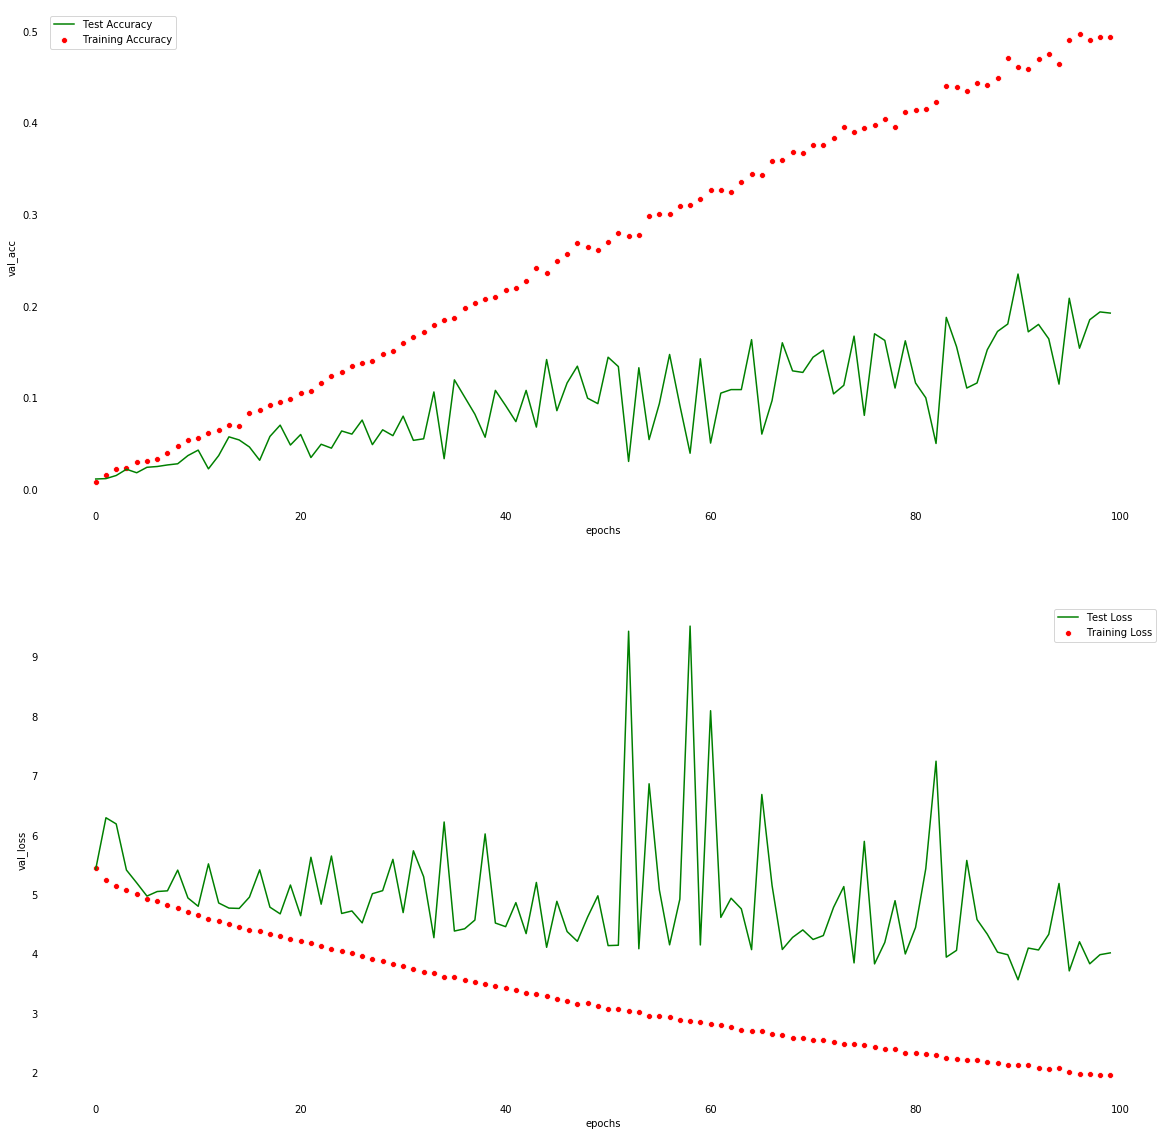

In [7]:
import seaborn as sns
sns.set_style({'xtick.bottom':False,
               'ytick.left':False,
               'axes.spines.bottom': False,
               'axes.spines.left': False,
               'axes.spines.right': False,
               'axes.spines.top': False})

ig,(ax,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(20,20))
sns.scatterplot(x='epochs',y='acc',data=vals,ax=ax,color='r')
sns.lineplot(x='epochs',y='val_acc',data=vals,ax=ax,color='g')
sns.scatterplot(x='epochs',y='loss',data=vals,ax=ax1,color='r')
sns.lineplot(x='epochs',y='val_loss',data=vals,ax=ax1,color='g')
ax.legend(labels=['Test Accuracy','Training Accuracy'])
ax1.legend(labels=['Test Loss','Training Loss'])

In [ ]:
# for i in range(n_iterations):
#         print('\r{}/{}'. format(i, n_iterations))
#         #initilaize random hyperparameters
#         random_parameters = {K: random.sample(V, 1)[0] for K, V in parameters_grid.items()}
#         #create model with random hyperparameters
#         model = create_model(random_parameters)
#         opt = create_RMSprop_optimizer(random_parameters)
#         #compile model
#         model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])
#         #train model
#         epochs = 40
#         checkpointer = ModelCheckpoint(filepath='saved_models/model_weights.hdf5', verbose=1, save_best_only=True)
#         early_stopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 8)
#         history = model.fit(X_train, Y_train,
#                   callbacks = [checkpointer, early_stopping],
#                   validation_split = 0.33,
#                   epochs=epochs, batch_size = 20, verbose=1)
#         #compare current min validation loss with global min validation loss
#         current_min_val_loss = np.min(history.history['val_loss'])
#         if(current_min_val_loss < global_min_val_loss):
#             global_min_val_loss = current_min_val_loss
#             #save the best model so far
#             model.load_weights('saved_models/model_weights.hdf5')
#             model.save('saved_models/best_model.h5')
#             print('saving new best model, val_loss = {}'.format(current_min_val_loss))
#             #save best hyperparameters
#             best_hyperparameters = random_parameters